In [5]:
import numpy as np
import matplotlib.pyplot as plt

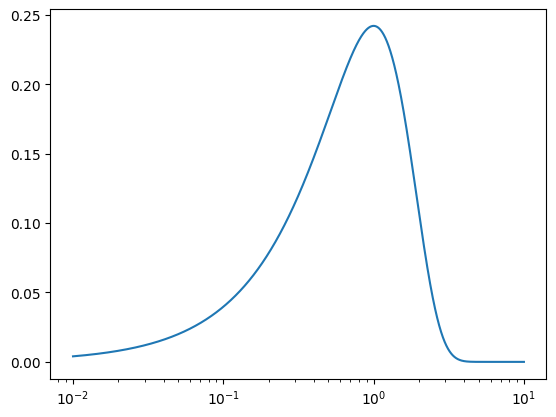

In [6]:
sigma = 1.0
func = lambda x: x * np.exp(-x**2/(2*sigma**2)) * 1.0/(sigma*np.sqrt(2*np.pi))
x = np.geomspace(0.01, 10, 10000)
plt.plot(x, func(x))
plt.xscale('log')

In [7]:
from scipy.optimize import root_scalar

def pdf(x, sigma):
    return x * np.exp(-x**2/(2*sigma**2)) * 1.0/(sigma*np.sqrt(2*np.pi))

def find_where_pdf_is_c(c, sigma):
    # Finds the two values of x where the pdf is equal to c
    mode_value = pdf(sigma, sigma)
    if c > mode_value:
        raise ValueError("c must be less than mode_value")
    where_below_mode = root_scalar(lambda x: pdf(x, sigma) - c, bracket=[0, sigma]).root
    where_above_mode = root_scalar(lambda x: pdf(x, sigma) - c, bracket=[sigma, 100]).root
    return where_below_mode, where_above_mode

def pdf_integral(sigma, c):
    # Calculates the integral (analytical) of the pdf from x1 to x2,
    # where x1 and x2 are the two values of x where the pdf is equal to c
    x1, x2 = find_where_pdf_is_c(c, sigma)
    return np.exp(-x1**2/(2*sigma**2)) - np.exp(-x2**2/(2*sigma**2))

def find_fraction(sigma, fraction):
    # Finds the value of c where the integral of the pdf from x1 to x2 is equal to fraction,
    # where x1 and x2 are the two values of x where the pdf is equal to c
    mode_value = pdf(sigma, sigma)
    return root_scalar(lambda x: pdf_integral(sigma, x) - fraction, x0=mode_value-0.01, x1=mode_value-0.02).root


# Verify that the integral is correct

# isoline_value = find_fraction(1.0, 0.5)
# x1, x2 = find_where_pdf_is_c(isoline_value, 1.0)

# from scipy.integrate import quad
# integral, _ = quad(lambda x: pdf(x, 1.0), x1, x2) / (sigma/np.sqrt(2*np.pi))  # divide by the normalization factor (integral from 0 to inf)
# print(integral)

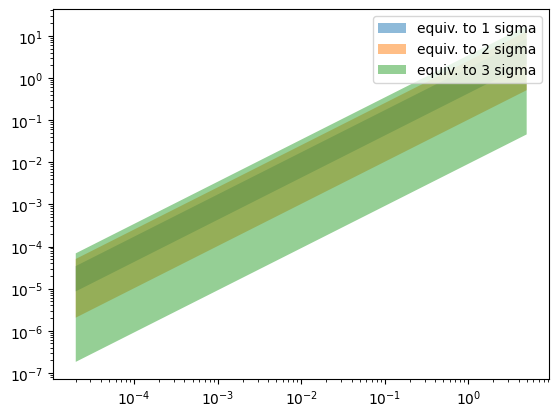

In [8]:
from scipy.stats import norm

desired_fractions = [
    norm.cdf(1, 0.0, 1.0) - norm.cdf(-1, 0.0, 1.0),  # 1 sigma
    norm.cdf(2, 0.0, 1.0) - norm.cdf(-2, 0.0, 1.0),  # 2 sigma
    norm.cdf(3, 0.0, 1.0) - norm.cdf(-3, 0.0, 1.0),  # 3 sigma
]
# print(desired_fractions)

sigmas = np.linspace(2e-5, 5e0, 5)

lower_bounds = []
upper_bounds = []
for desired_fraction in desired_fractions:
    lower_bounds.append([])
    upper_bounds.append([])
    for sigma in sigmas:
        isoline_value = find_fraction(sigma, desired_fraction)
        x1, x2 = find_where_pdf_is_c(isoline_value, sigma)
        lower_bounds[-1].append(x1)
        upper_bounds[-1].append(x2)
    lower_bounds[-1] = np.array(lower_bounds[-1])
    upper_bounds[-1] = np.array(upper_bounds[-1])

for i, desired_fraction in enumerate(desired_fractions):
    plt.fill_between(sigmas, lower_bounds[i], upper_bounds[i], alpha=0.5, label=f"equiv. to {i+1} sigma")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
